One approach for defining the nearfield/farfield boundary is to set an error threshold for a low order quadrature rule. If the error incurred at a point by that quadrature rule is above the threshold, then the point is part of the nearfield. If the error is below the threshold, then the point is farfield. 

Here, I determine the near/far boundary based on a 7th order Clenshaw-Curtis quadrature rule. 

This is directly relevant for the box code implementation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

In [2]:
import quadpy

def clencurt(n1):
    """Computes the Clenshaw Curtis quadrature nodes and weights"""
    C = quadpy.c1.clenshaw_curtis(n1)
    return (C.points, C.weights)


# TODO: is there a quadpy function that does tensor products?
def tensor_product(x, w):
    rect_x, rect_y = np.meshgrid(x, x)
    rect_pts = np.array([rect_x.flatten(), rect_y.flatten()]).T
    rect_w = np.outer(w, w).flatten()
    return rect_pts, rect_w


def clencurt_2d(n):
    return tensor_product(*clencurt(n))

In [3]:
def fundamental_soln_matrix(obs_pts, src_pts):
    dx = obs_pts[:, None, 0] - src_pts[None, :, 0]
    dy = obs_pts[:, None, 1] - src_pts[None, :, 1]
    r2 = (dx ** 2) + (dy ** 2)
    r = np.sqrt(r2)
    G = (1.0 / (2 * np.pi)) * np.log(r)
    return G[:, None, :]

In [4]:
nobs = 300
zoomx = np.array([-50, 50])
zoomy = np.array([-50, 50])
xs = np.linspace(*zoomx, nobs)
ys = np.linspace(*zoomy, nobs)
obsx, obsy = np.meshgrid(xs, ys)
obsx_flat = obsx.flatten()
obsy_flat = obsy.flatten()

In [5]:
q1 = clencurt_2d(7)
G1 = fundamental_soln_matrix(np.array([obsx_flat, obsy_flat]).T.copy(), q1[0])[:, 0, :] * q1[1][None,:]
S1 = np.sum(G1, axis=1).reshape(obsx.shape)

q2 = clencurt_2d(75)
G2 = fundamental_soln_matrix(np.array([obsx_flat, obsy_flat]).T.copy(), q2[0])[:, 0, :] * q2[1][None,:]
S2 = np.sum(G2, axis=1).reshape(obsy.shape)

<ipython-input-6-8b011092bb2b>:39: RuntimeWarning: divide by zero encountered in log10
  err = np.log10(np.abs(S2-S1))


(-50.0, 50.0)

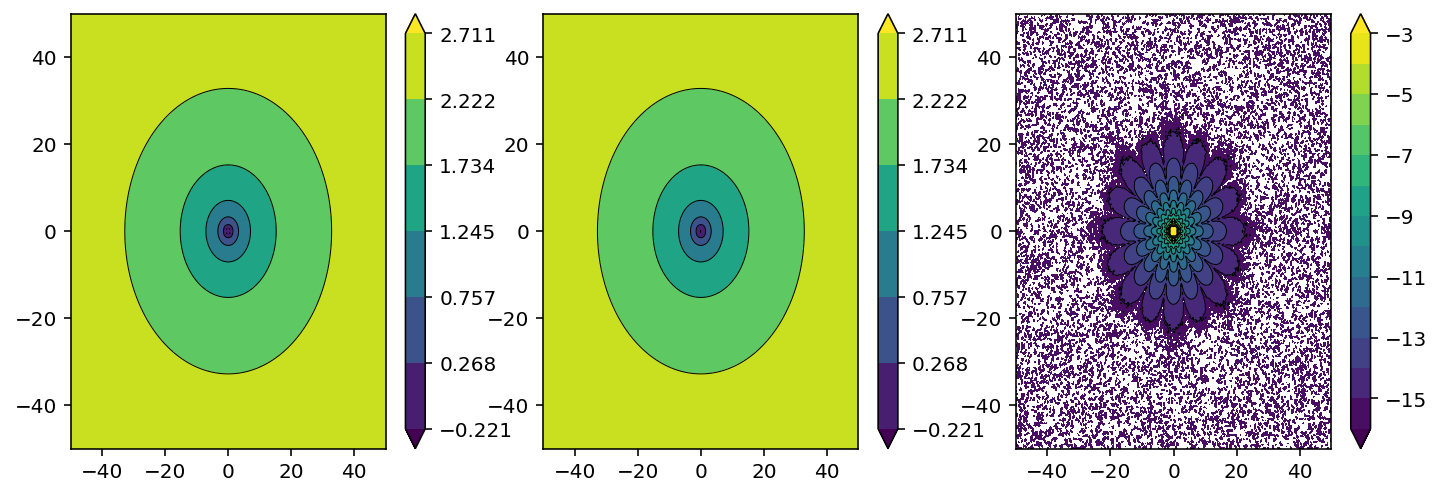

In [6]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
levels = np.linspace(np.min(S2), np.max(S2), 7)
cntf = plt.contourf(obsx, obsy, S1, levels=levels, extend="both")
plt.contour(
    obsx,
    obsy,
    S1,
    colors="k",
    linestyles="-",
    linewidths=0.5,
    levels=levels,
    extend="both",
)
plt.colorbar(cntf)
plt.xlim(zoomx)
plt.ylim(zoomy)

plt.subplot(1,3,2)
levels = np.linspace(np.min(S2), np.max(S2), 7)
cntf = plt.contourf(obsx, obsy, S2, levels=levels, extend="both")
plt.contour(
    obsx,
    obsy,
    S2,
    colors="k",
    linestyles="-",
    linewidths=0.5,
    levels=levels,
    extend="both",
)
plt.colorbar(cntf)
plt.xlim(zoomx)
plt.ylim(zoomy)



plt.subplot(1,3,3)
err = np.log10(np.abs(S2-S1))
levels = np.linspace(-16, -3, 14)
cntf = plt.contourf(obsx, obsy, err, levels=levels, extend="both")
plt.contour(
    obsx,
    obsy,
    err,
    colors="k",
    linestyles="-",
    linewidths=0.5,
    levels=levels,
    extend="both",
)
plt.colorbar(cntf)
plt.xlim(zoomx)
plt.ylim(zoomy)